<a href="https://colab.research.google.com/github/imammarzuki/Project/blob/main/Salinan_dari_Latihan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Untuk pengolahan data
import pandas as pd
import numpy as np
from zipfile import ZipFile
from pathlib import Path

# Untuk visualisasi data
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_palette('Set1')
sns.set()

sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

# Untuk pemodelan
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Untuk menghilangkan warnings saat plotting seaborn
import warnings
warnings.filterwarnings('ignore')

# Untuk mengupload file
import os

In [2]:
# Upload semua dataset yang dipakai
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
from google.colab import drive
drive.mount('/content/drive')





Mounted at /content/drive


In [4]:
# Menyimpan masing-masing dataset kedalam variabel

rating = pd.read_csv('drive/MyDrive/Project/1/tourism_rating.csv')
place = pd.read_csv('drive/MyDrive/Project/1/tourism_with_id.csv')
user = pd.read_csv('drive/MyDrive/Project/1/user.csv')
package = pd.read_csv('drive/MyDrive/Project/1/package_tourism.csv')

In [5]:
place

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,433,Museum Mpu Tantular,Museum Negeri Mpu Tantular adalah sebuah museu...,Budaya,Surabaya,2000,4.4,45.0,"{'lat': -7.4338593, 'lng': 112.7199058}",-7.433859,112.719906,NaN,433
433,434,Taman Bungkul,Taman Bungkul adalah taman wisata kota yang te...,Taman Hiburan,Surabaya,0,4.6,NaN,"{'lat': -7.291346799999999, 'lng': 112.7398218}",-7.291347,112.739822,NaN,434
434,435,Taman Air Mancur Menari Kenjeran,Air mancur menari atau dancing fountain juga a...,Taman Hiburan,Surabaya,0,4.4,45.0,"{'lat': -7.2752955, 'lng': 112.7549381}",-7.275296,112.754938,NaN,435
435,436,Taman Flora Bratang Surabaya,Taman Flora adalah salah satu taman kota di Su...,Taman Hiburan,Surabaya,0,4.6,NaN,"{'lat': -7.294330299999999, 'lng': 112.7617534}",-7.294330,112.761753,NaN,436


In [6]:
# Membuang kolom yang tidak dipakai

place = place.drop(['Unnamed: 11','Unnamed: 12'],axis=1)
place.sample(5)

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long
194,195,Pantai Jogan,Pantai Jogan adalah objek wisata pantai yang t...,Bahari,Yogyakarta,5000,4.4,NaN,"{'lat': -8.180135, 'lng': 110.6763715}",-8.180135,110.676372
65,66,Museum Layang-layang,Museum Layang-Layang adalah sebuah museum yang...,Budaya,Jakarta,10000,4.5,90.0,"{'lat': -6.3080282, 'lng': 106.790548}",-6.308028,106.790548
306,307,Perkebunan Teh Malabar,Salah satu perkebunan teh yang cukup terkenal ...,Cagar Alam,Bandung,5000,4.4,NaN,"{'lat': -7.2274463, 'lng': 107.6050805}",-7.227446,107.605080
288,289,Curug Aseupan,Curug Aseupan berada di kawasan Curug Tilu Leu...,Cagar Alam,Bandung,10000,4.7,NaN,"{'lat': -6.7875652, 'lng': 107.5822844}",-6.787565,107.582284
105,106,Kawasan Malioboro,Jalan Malioboro adalah nama salah satu kawasan...,Taman Hiburan,Yogyakarta,0,4.8,NaN,"{'lat': -7.793167, 'lng': 110.3655238}",-7.793167,110.365524


In [7]:
# Merubah data agar hanya dari Kota Bandung

place_bandung = place[place['City']=='Bandung']
place_bandung.head(10)

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long
210,211,GunungTangkuban perahu,Gunung Tangkuban Parahu adalah salah satu gunu...,Cagar Alam,Bandung,30000,4.5,NaN,"{'lat': -6.759637700000001, 'lng': 107.6097807}",-6.759638,107.609781
211,212,Jalan Braga,Jalan Braga adalah nama sebuah jalan utama di ...,Budaya,Bandung,0,4.7,NaN,"{'lat': -6.9150534, 'lng': 107.6089842}",-6.915053,107.608984
212,213,Gedung Sate,"Gedung Sate, dengan ciri khasnya berupa orname...",Budaya,Bandung,5000,4.6,NaN,"{'lat': -6.9024812, 'lng': 107.61881}",-6.902481,107.618810
213,214,Trans Studio Bandung,Trans Studio Bandung adalah kawasan wisata ter...,Taman Hiburan,Bandung,280000,4.5,240.0,"{'lat': -6.9250943, 'lng': 107.6364944}",-6.925094,107.636494
214,215,Taman Hutan Raya Ir. H. Djuanda,Taman Hutan Raya Ir. H. Djuanda (Tahura Djuand...,Cagar Alam,Bandung,15000,4.5,90.0,"{'lat': -6.8565791, 'lng': 107.6323734}",-6.856579,107.632373
215,216,Farm House Susu Lembang,"Sebagai salah satu tempat wisata lembang baru,...",Taman Hiburan,Bandung,30000,4.4,NaN,"{'lat': -6.832968999999999, 'lng': 107.6056183}",-6.832969,107.605618
216,217,Kebun Binatang Bandung,Kebun Binatang Bandung merupakan salah satu ob...,Cagar Alam,Bandung,20000,4.0,180.0,"{'lat': -6.8897177, 'lng': 107.6077282}",-6.889718,107.607728
217,218,Kawah Putih,Kawah Putih adalah sebuah tempat wisata di Jaw...,Cagar Alam,Bandung,81000,4.5,NaN,"{'lat': -7.166203899999999, 'lng': 107.4021256}",-7.166204,107.402126
218,219,Tebing Karaton,Tebing Keraton atau Tebing Karaton merupakan s...,Cagar Alam,Bandung,15000,4.5,NaN,"{'lat': -6.8340683, 'lng': 107.6636151}",-6.834068,107.663615
219,220,Dusun Bambu,Dusun Bambu merupakan taman rekreasi berbasis ...,Taman Hiburan,Bandung,25000,4.5,NaN,"{'lat': -6.7897147, 'lng': 107.5791627}",-6.789715,107.579163


In [8]:
place_bandung.info()

<class 'pandas.core.frame.DataFrame'>
Index: 124 entries, 210 to 333
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      124 non-null    int64  
 1   Place_Name    124 non-null    object 
 2   Description   124 non-null    object 
 3   Category      124 non-null    object 
 4   City          124 non-null    object 
 5   Price         124 non-null    int64  
 6   Rating        124 non-null    float64
 7   Time_Minutes  50 non-null     float64
 8   Coordinate    124 non-null    object 
 9   Lat           124 non-null    float64
 10  Long          124 non-null    float64
dtypes: float64(4), int64(2), object(5)
memory usage: 11.6+ KB


In [9]:
# Membuang kolom yang tidak dipakai

place_bandung = place_bandung.drop('Time_Minutes', axis=1)

In [10]:
# melihat gambaran data rating

rating.head()

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4


In [11]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


In [12]:
# Merubah data rating agar hanya berisi rating pada tempat wisata dari Kota Bandung

rating_bandung = pd.merge(rating, place_bandung[['Place_Id']], how='right', on='Place_Id')
rating_bandung.head()

,User_Id,Place_Id,Place_Ratings
0,9,211,3
1,26,211,2
2,40,211,3
3,40,211,2
4,70,211,5


In [13]:
# Melihat ukuran dataset rating untuk Kota Bandung

rating_bandung.shape

(2842, 3)

In [14]:
# Melihat gambaran data user

user.head()

,User_Id,Location,Age
0,1,"Semarang, Jawa Tengah",20
1,2,"Bekasi, Jawa Barat",21
2,3,"Cirebon, Jawa Barat",23
3,4,"Bekasi, Jawa Barat",21
4,5,"Lampung, Sumatera Selatan",20


In [15]:
# Merubah data user agar hanya berisi user yang pernah megunjungi wisata di Kota Bandung

user_bandung = pd.merge(user, rating_bandung[['User_Id']], how='right', on='User_Id').drop_duplicates().sort_values('User_Id')
user_bandung.head()

,User_Id,Location,Age
260,1,"Semarang, Jawa Tengah",20
1178,2,"Bekasi, Jawa Barat",21
279,3,"Cirebon, Jawa Barat",23
418,4,"Bekasi, Jawa Barat",21
1655,5,"Lampung, Sumatera Selatan",20


In [16]:
# Melihat dataset user yang pernah memberi rating pada wisata di Kota Bandung

user.shape

(300, 3)

In [17]:
df_merged = pd.merge(rating_bandung, place_bandung, on='Place_Id')
df_bandung = pd.merge(df_merged, user_bandung, on='User_Id')

In [18]:
df_bandung.sample(5)

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,Category,City,Price,Rating,Coordinate,Lat,Long,Location,Age
1295,185,318,2,Situ Patenggang,Situ Patenggang atau Situ Patengan adalah suat...,Cagar Alam,Bandung,20000,4.5,"{'lat': -7.1669649, 'lng': 107.3575344}",-7.166965,107.357534,"Cilacap, Jawa Tengah",33
37,70,211,5,GunungTangkuban perahu,Gunung Tangkuban Parahu adalah salah satu gunu...,Cagar Alam,Bandung,30000,4.5,"{'lat': -6.759637700000001, 'lng': 107.6097807}",-6.759638,107.609781,"Bogor, Jawa Barat",21
678,36,242,3,Curug Dago,Curug Dago Kota Bandung Jawa Barat berada di k...,Cagar Alam,Bandung,12000,4.0,"{'lat': -6.865522499999999, 'lng': 107.6181878}",-6.865522,107.618188,"Solo, Jawa Tengah",20
250,244,331,4,Kyotoku Floating Market,"Kyotoku Floating Market Bandung, sebuah wisata...",Budaya,Bandung,175000,4.5,"{'lat': -6.819874999999999, 'lng': 107.618707}",-6.819875,107.618707,"Jakarta Utara, DKI Jakarta",27
1310,206,322,5,Bukit Jamur,Bukit Jamur Ciwidey adalah satu dari sekian ba...,Cagar Alam,Bandung,0,4.2,"{'lat': -7.195110199999998, 'lng': 107.4312811}",-7.195110,107.431281,"Surabaya, Jawa Timur",30


In [19]:
df_bandung.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2842 entries, 0 to 2841
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   User_Id        2842 non-null   int64  
 1   Place_Id       2842 non-null   int64  
 2   Place_Ratings  2842 non-null   int64  
 3   Place_Name     2842 non-null   object 
 4   Description    2842 non-null   object 
 5   Category       2842 non-null   object 
 6   City           2842 non-null   object 
 7   Price          2842 non-null   int64  
 8   Rating         2842 non-null   float64
 9   Coordinate     2842 non-null   object 
 10  Lat            2842 non-null   float64
 11  Long           2842 non-null   float64
 12  Location       2842 non-null   object 
 13  Age            2842 non-null   int64  
dtypes: float64(3), int64(5), object(6)
memory usage: 311.0+ KB


Tampak nya tidak ada data yang missing value.

In [20]:
df_bandung[df_bandung.duplicated()==True]

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,Category,City,Price,Rating,Coordinate,Lat,Long,Location,Age
460,7,213,3,Gedung Sate,"Gedung Sate, dengan ciri khasnya berupa orname...",Budaya,Bandung,5000,4.6,"{'lat': -6.9024812, 'lng': 107.61881}",-6.902481,107.618810,"Jakarta Selatan, DKI Jakarta",39
556,133,307,4,Perkebunan Teh Malabar,Salah satu perkebunan teh yang cukup terkenal ...,Cagar Alam,Bandung,5000,4.4,"{'lat': -7.2274463, 'lng': 107.6050805}",-7.227446,107.605080,"Surabaya, Jawa Timur",29
561,144,250,2,Pesona Nirwana Waterpark & Cottages,Pesona Nirwana Waterpark merupakan sebuah obje...,Taman Hiburan,Bandung,50000,4.1,"{'lat': -7.040915399999998, 'lng': 107.5269156}",-7.040915,107.526916,"Depok, Jawa Barat",18
596,205,323,3,Kebun Tanaman Obat Sari Alam,Kebun Tanaman Obat Sari Alam lebih terkenal de...,Cagar Alam,Bandung,0,4.9,"{'lat': -6.601320999999999, 'lng': 106.632734}",-6.601321,106.632734,"Bandung, Jawa Barat",24
873,113,218,4,Kawah Putih,Kawah Putih adalah sebuah tempat wisata di Jaw...,Cagar Alam,Bandung,81000,4.5,"{'lat': -7.166203899999999, 'lng': 107.4021256}",-7.166204,107.402126,"Semarang, Jawa Tengah",38
920,235,232,5,Bukit Moko,Bandung sebagai destinasi wisata tak pernah ad...,Cagar Alam,Bandung,25000,4.5,"{'lat': -6.8422202, 'lng': 107.6767988}",-6.842220,107.676799,"Serang, Banten",18
1136,152,322,3,Bukit Jamur,Bukit Jamur Ciwidey adalah satu dari sekian ba...,Cagar Alam,Bandung,0,4.2,"{'lat': -7.195110199999998, 'lng': 107.4312811}",-7.195110,107.431281,"Jakarta Utara, DKI Jakarta",25
1295,185,318,2,Situ Patenggang,Situ Patenggang atau Situ Patengan adalah suat...,Cagar Alam,Bandung,20000,4.5,"{'lat': -7.1669649, 'lng': 107.3575344}",-7.166965,107.357534,"Cilacap, Jawa Tengah",33
1317,225,247,3,Kiara Artha Park,Kiara Artha Park merupakan sebuah kawasan terp...,Taman Hiburan,Bandung,15000,4.4,"{'lat': -6.9159459, 'lng': 107.6421462}",-6.915946,107.642146,"Sragen, Jawa Tengah",19
1454,131,244,4,Kampung Batu Malakasari,Kampung Batu Malakasari adalah sebuah tempat w...,Taman Hiburan,Bandung,10000,4.1,"{'lat': -7.0093633, 'lng': 107.6069444}",-7.009363,107.606944,"Lampung, Sumatera Selatan",21


Masih ada data yang duplikat.

In [21]:
# Menghapus data duplikat

df_bandung.drop_duplicates(inplace=True)

In [22]:
df_bandung.duplicated().sum()

0

Sudah tidak duplikat lagi datanya.

# EDA

In [23]:
df_bandung.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2822 entries, 0 to 2841
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   User_Id        2822 non-null   int64  
 1   Place_Id       2822 non-null   int64  
 2   Place_Ratings  2822 non-null   int64  
 3   Place_Name     2822 non-null   object 
 4   Description    2822 non-null   object 
 5   Category       2822 non-null   object 
 6   City           2822 non-null   object 
 7   Price          2822 non-null   int64  
 8   Rating         2822 non-null   float64
 9   Coordinate     2822 non-null   object 
 10  Lat            2822 non-null   float64
 11  Long           2822 non-null   float64
 12  Location       2822 non-null   object 
 13  Age            2822 non-null   int64  
dtypes: float64(3), int64(5), object(6)
memory usage: 330.7+ KB


In [24]:
nums = ['Price', 'Rating', 'Age', 'Lat', 'Long']
cats = ['Place_Name', 'Category', 'Location']

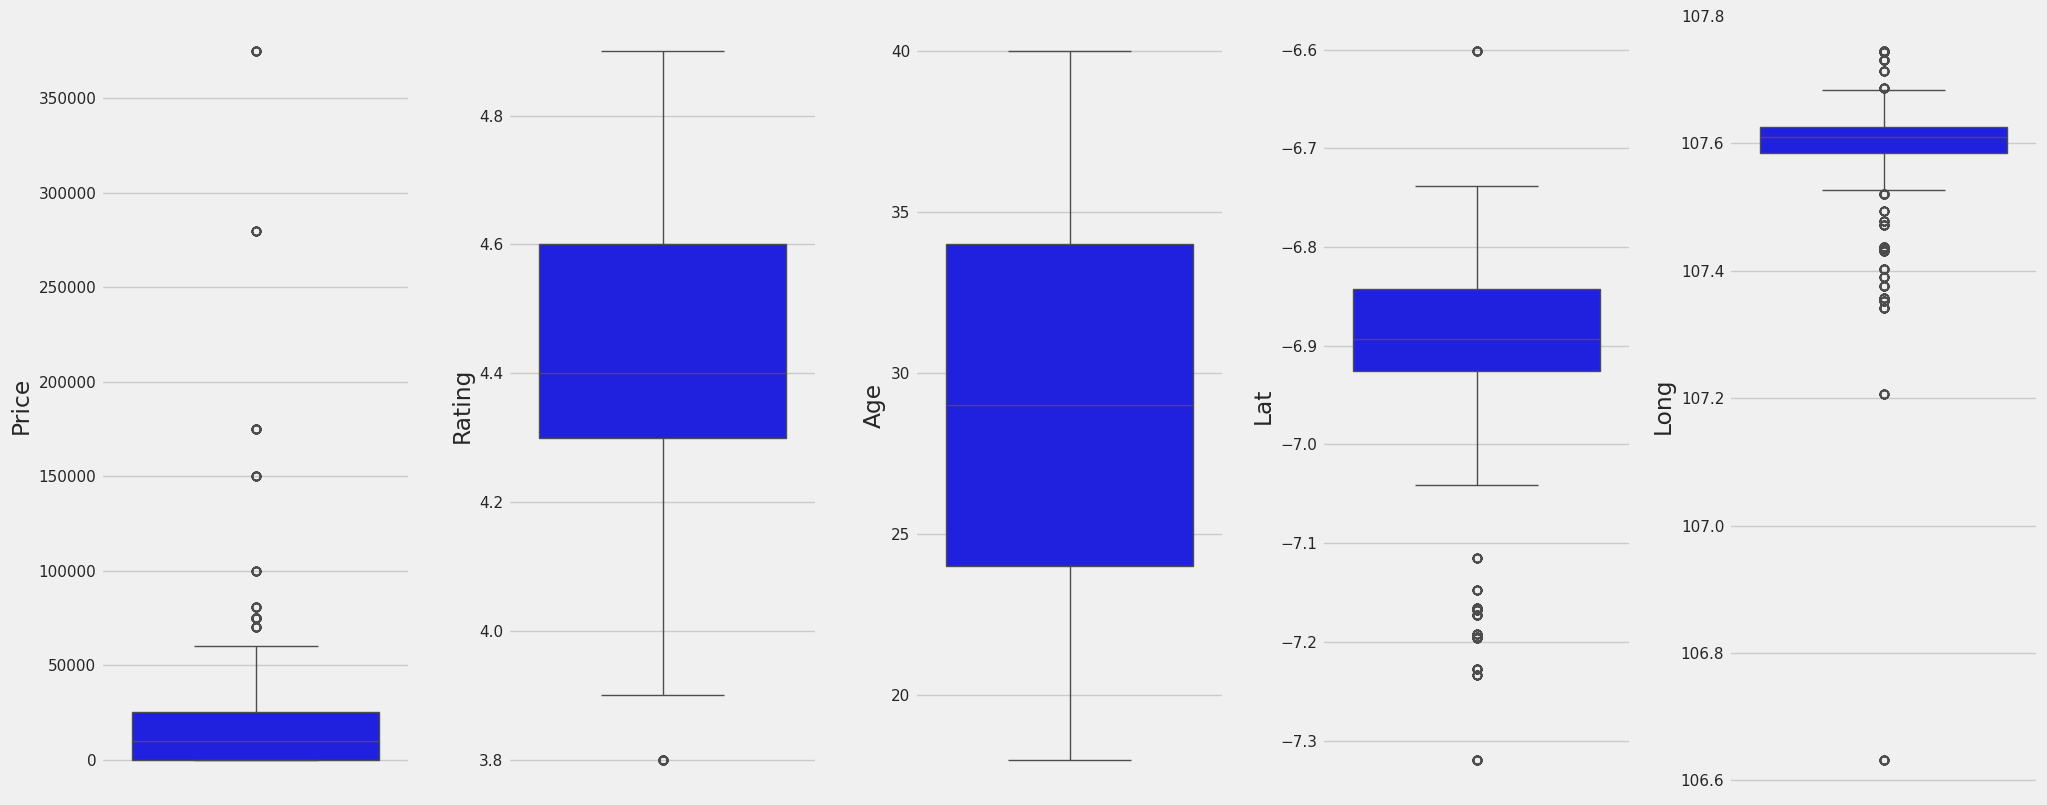

In [25]:
for i in range(len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df_bandung[nums[i]], color='blue', orient='v')
    plt.tight_layout()

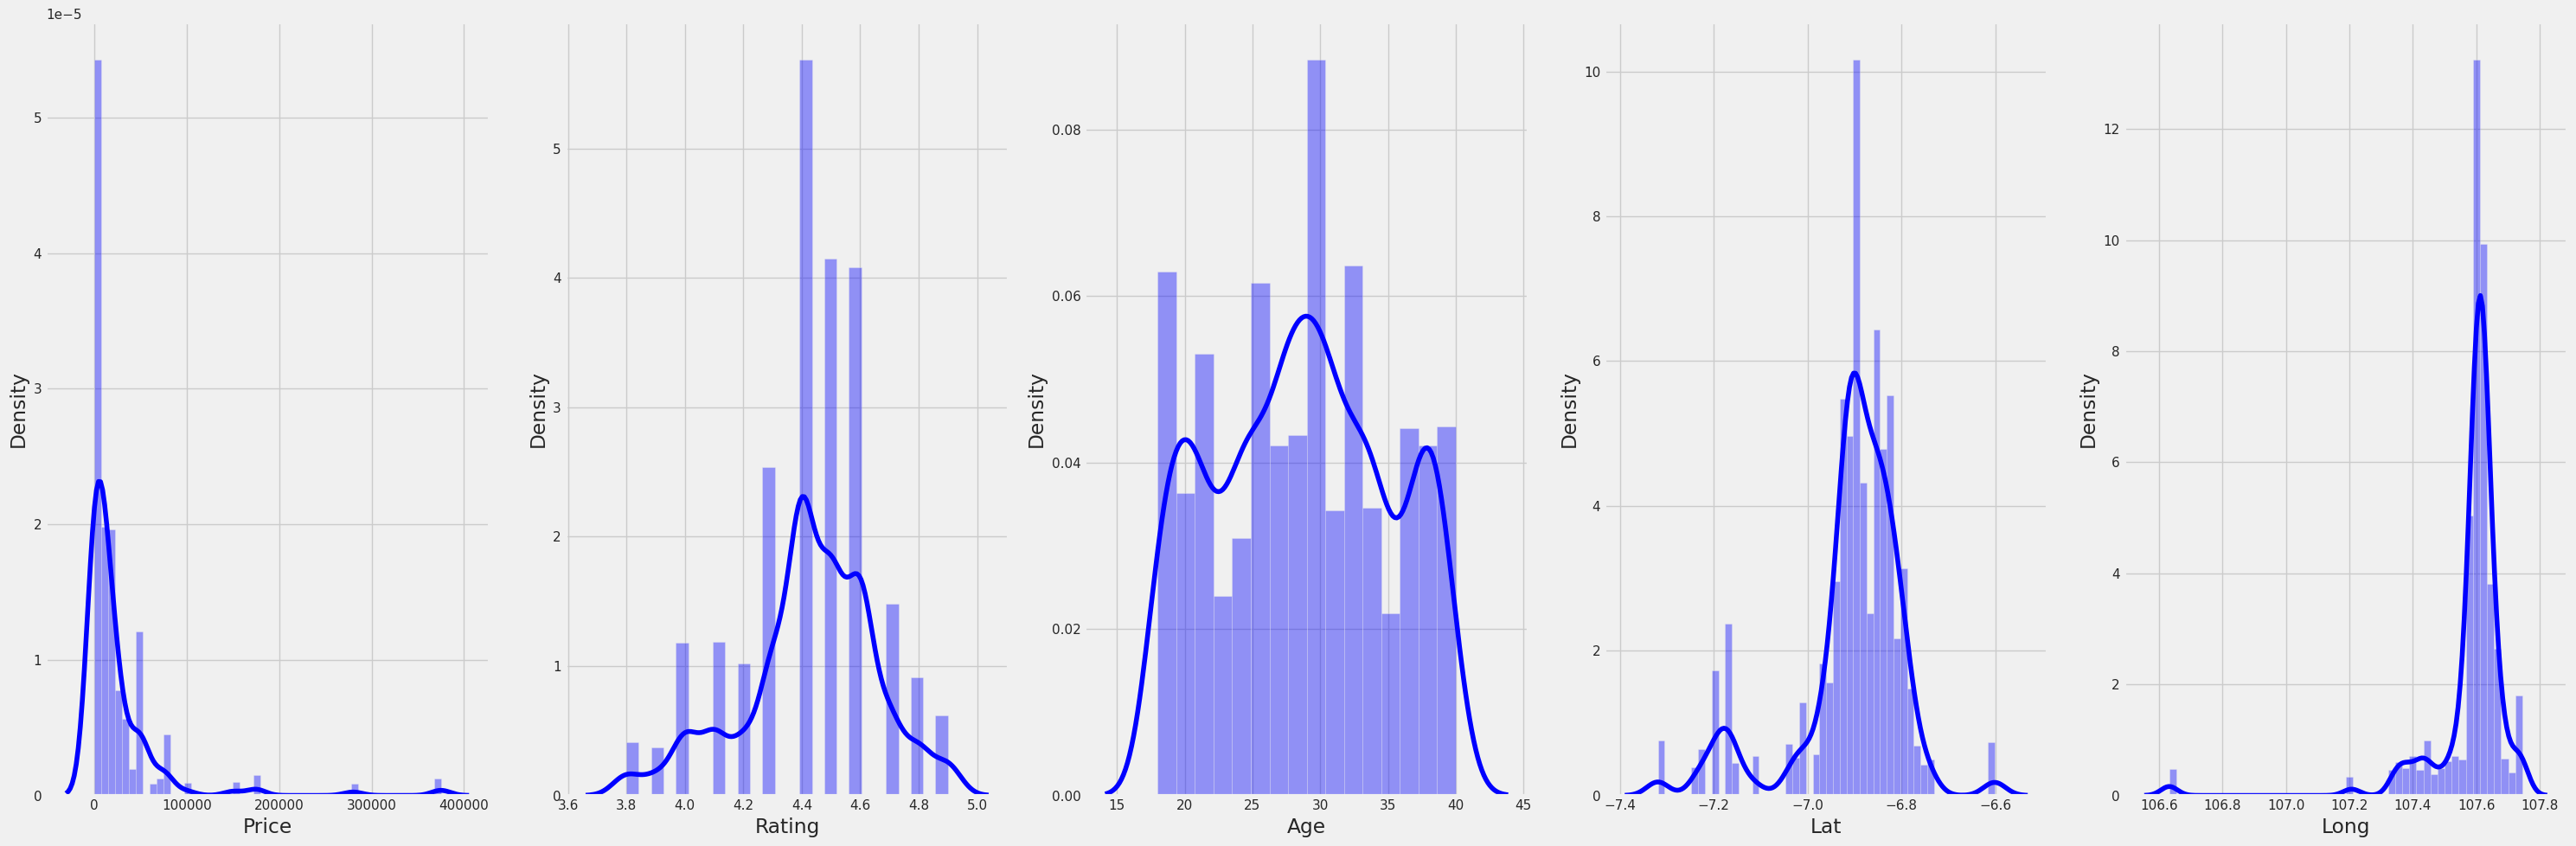

In [26]:
plt.figure(figsize=(30, 10))
for i in range(len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.distplot(df_bandung[nums[i]], color='blue')
    plt.tight_layout()

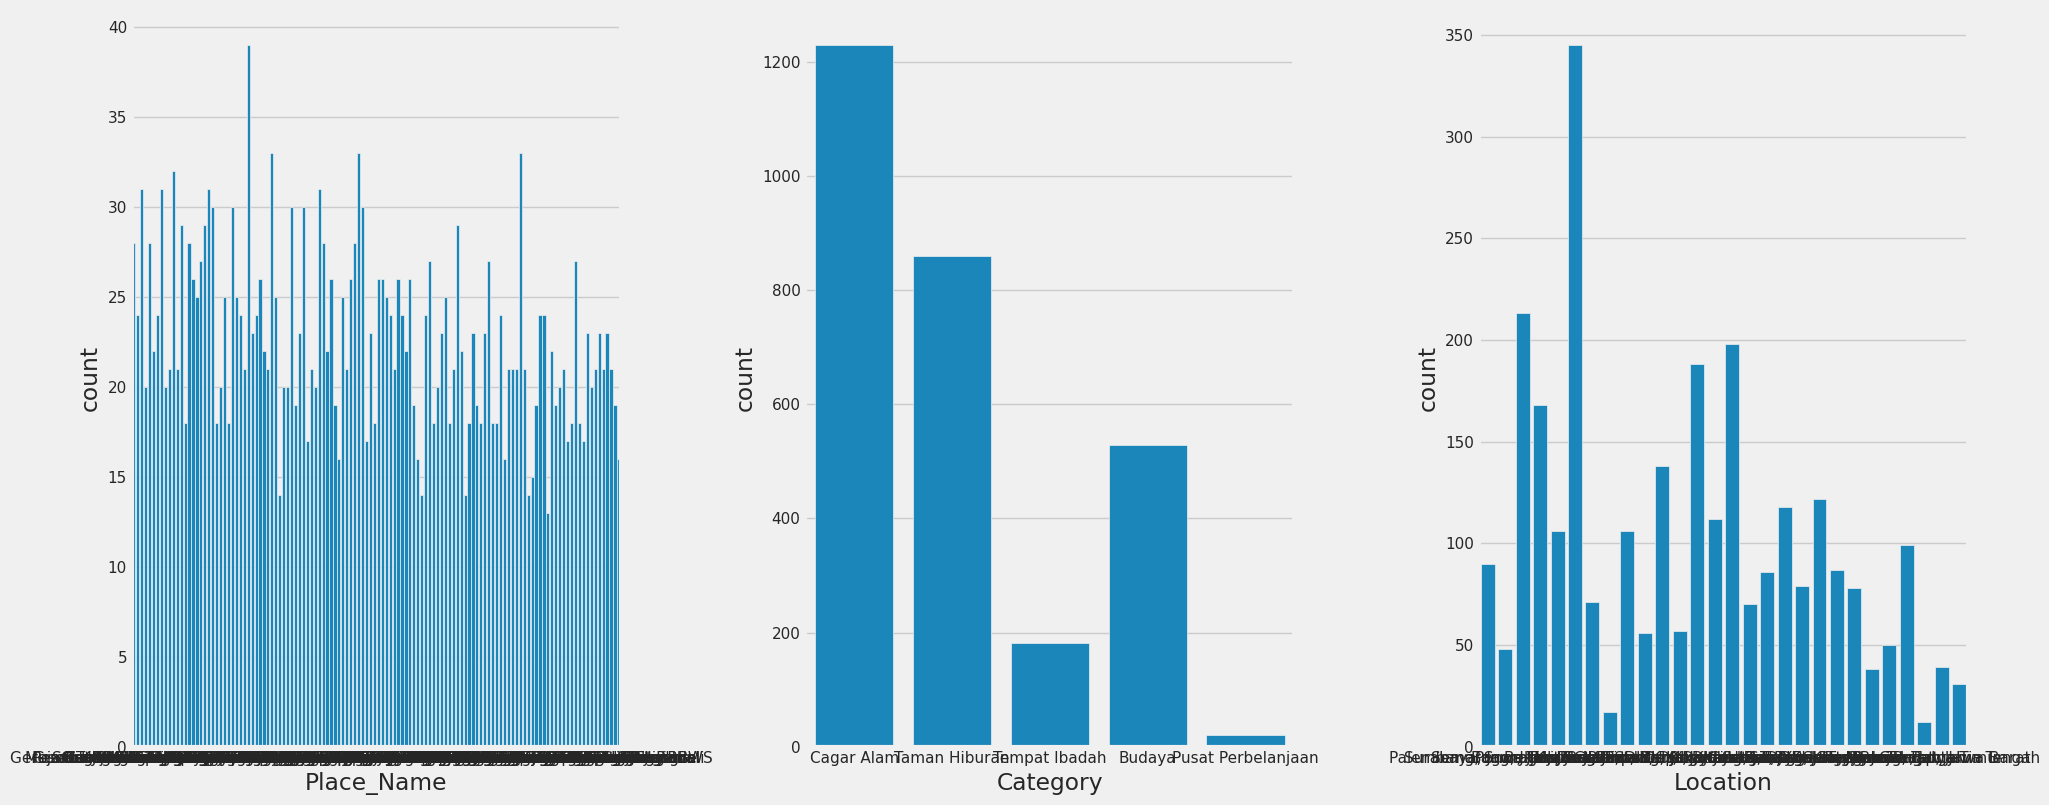

In [27]:
for i in range(len(cats)):
  plt.subplot(1, len(cats), i+1)
  sns.countplot(x=df_bandung[cats[i]])
  plt.tight_layout()

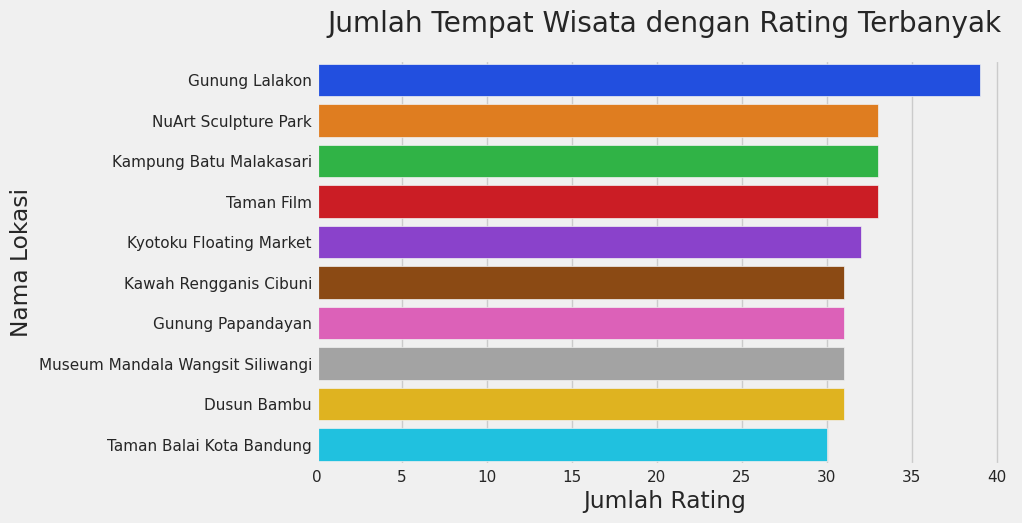

In [28]:
plt.figure(figsize=(8,5))
sns.barplot(y='Place_Name', x='count', data=df_bandung['Place_Name'].value_counts().reset_index()[:10], palette='bright')
plt.title('Jumlah Tempat Wisata dengan Rating Terbanyak', pad=20)
plt.xlabel('Jumlah Rating')
plt.ylabel('Nama Lokasi')
plt.show()

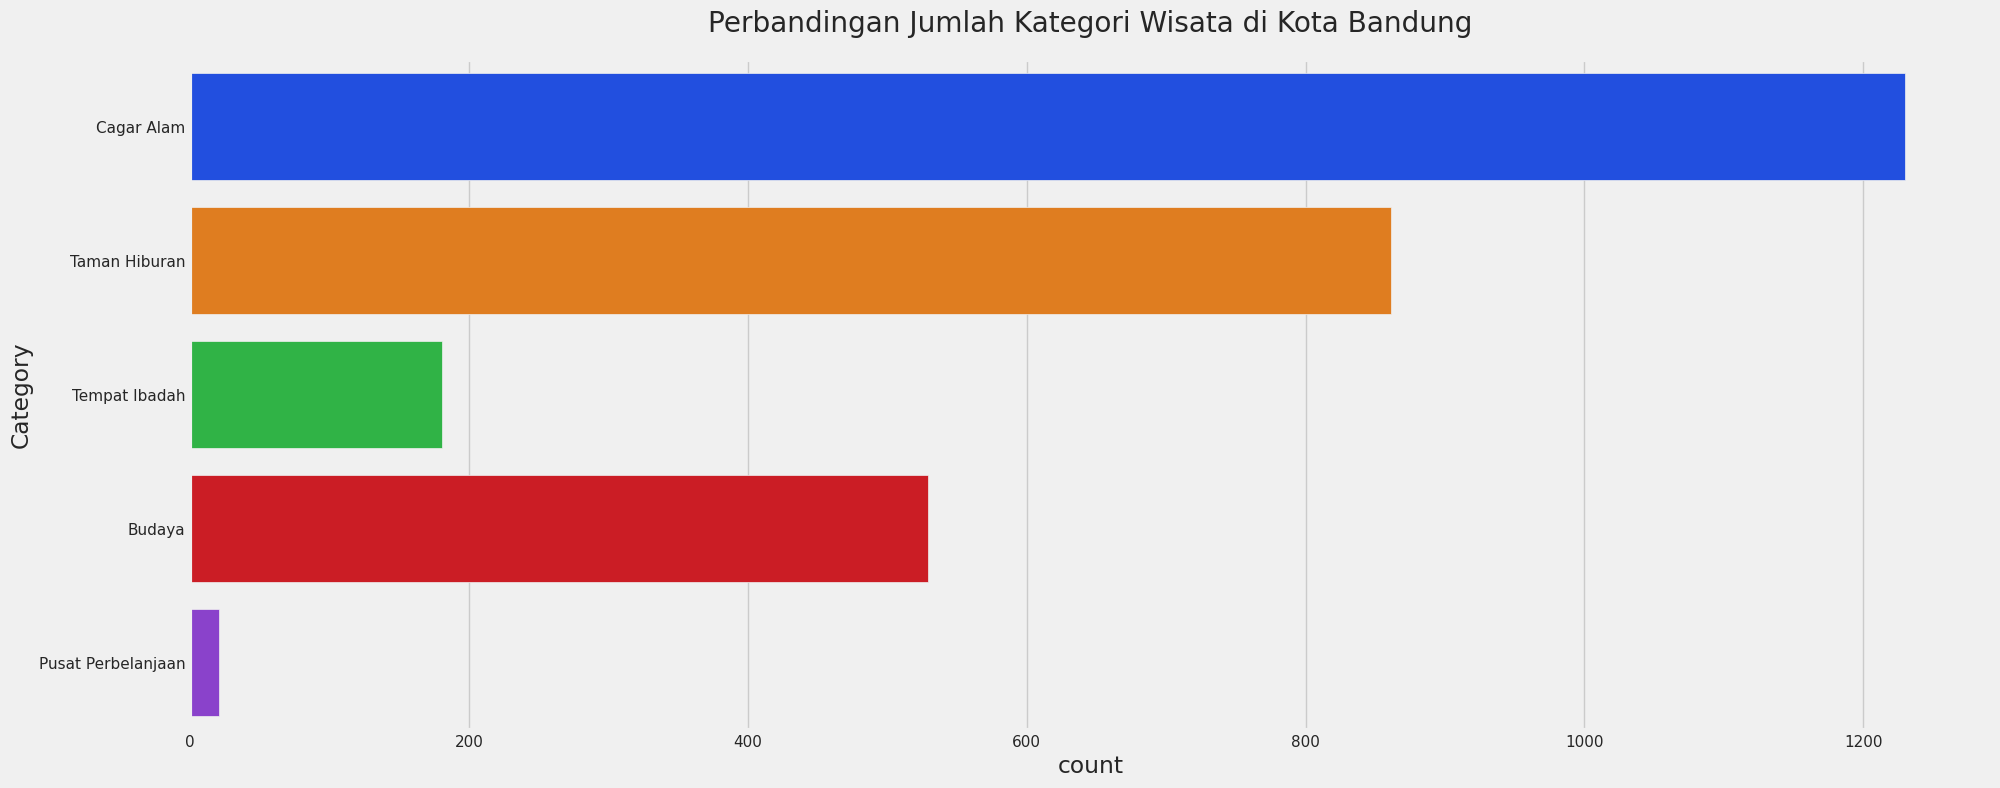

In [29]:
sns.countplot(y='Category', data=df_bandung, palette='bright')
plt.title('Perbandingan Jumlah Kategori Wisata di Kota Bandung', pad=20)
plt.show()

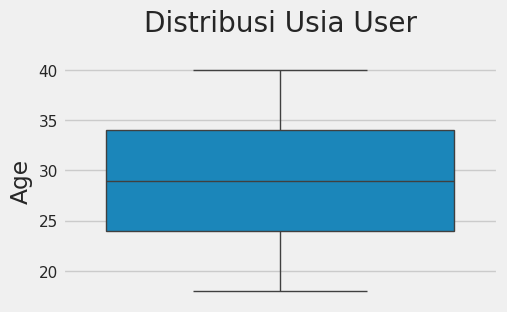

In [48]:
# Membuat visualisasi distribusi usia user

plt.figure(figsize=(5,3))
sns.boxplot(user['Age']);
plt.title('Distribusi Usia User', pad=20)
plt.show()

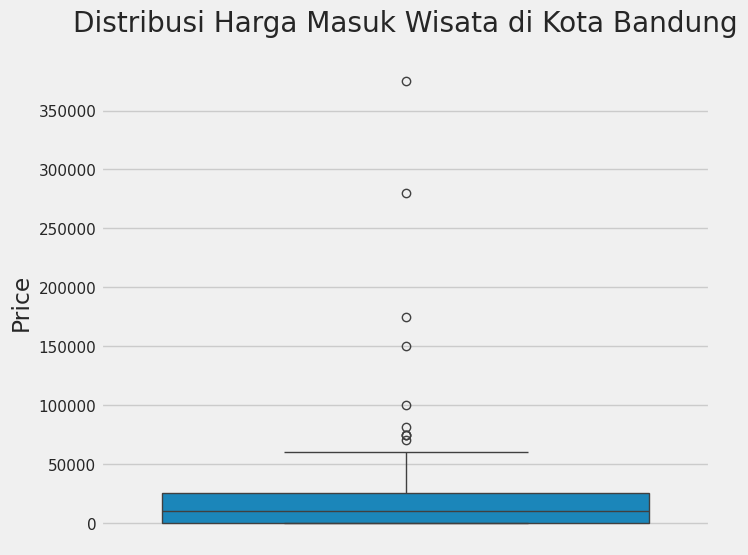

In [61]:
# Membuat visualisasi distribusi harga masuk tempat wisata

plt.figure(figsize=(7,6))
sns.boxplot(place_bandung['Price'])
plt.title('Distribusi Harga Masuk Wisata di Kota Bandung', pad=20)
plt.show()

In [62]:
place_bandung = place_bandung[place_bandung['Price']<= 50000]
place_bandung.head(20)
id_place_murah=place_bandung.index
id_place_murah

Index([210, 211, 212, 214, 215, 216, 218, 219, 220, 221,
       ...
       322, 323, 325, 326, 327, 328, 329, 331, 332, 333],
      dtype='int64', length=113)

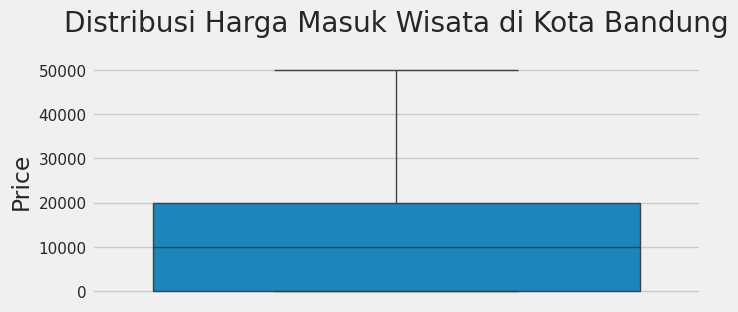

In [63]:
plt.figure(figsize=(7,3))
sns.boxplot(place_bandung['Price'])
plt.title('Distribusi Harga Masuk Wisata di Kota Bandung', pad=20)
plt.show()

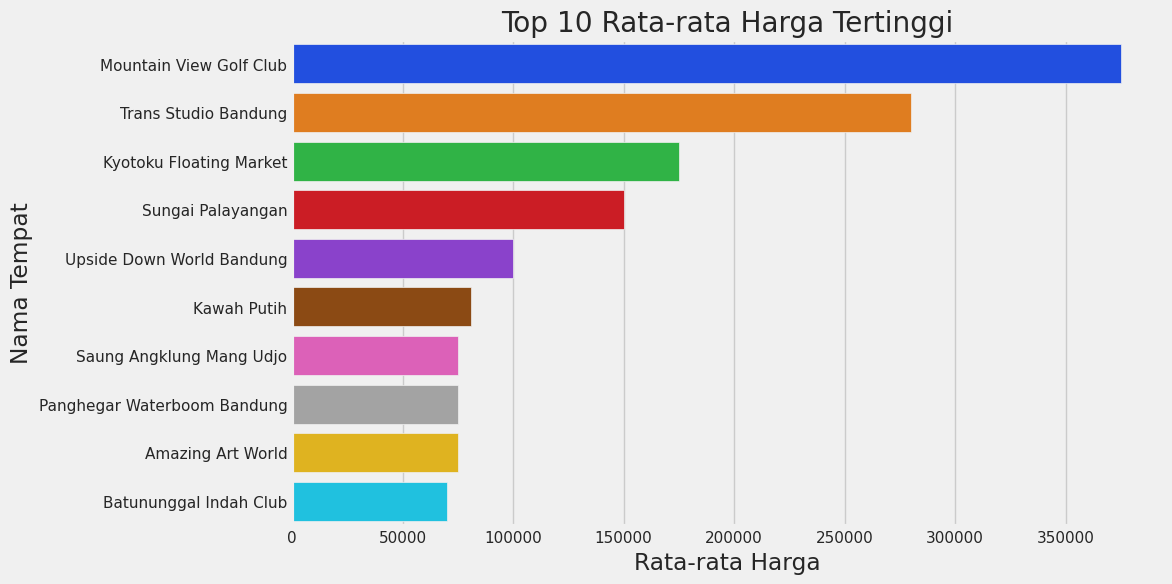

In [30]:
top_price_place = df_bandung.groupby('Place_Name')['Price'] \
.mean().reset_index().sort_values(by='Price', ascending=False)[:10]

plt.figure(figsize=(10, 6))
sns.barplot(y='Place_Name', x='Price', data=top_price_place, palette='bright')
plt.title('Top 10 Rata-rata Harga Tertinggi')
plt.ylabel('Nama Tempat')
plt.xlabel('Rata-rata Harga')
plt.show()

In [65]:
place_bandung.size

1130

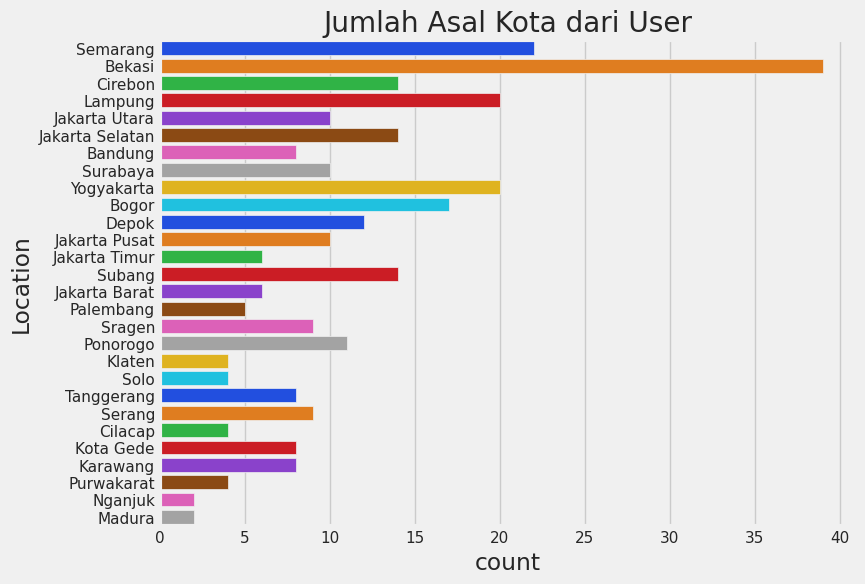

In [67]:
# Memfilter asal kota dari user
askot = user['Location'].apply(lambda x : x.split(',')[0])

# Visualisasi asal kota dari user
plt.figure(figsize=(8,6))
sns.countplot(y=askot, palette="bright")
plt.title('Jumlah Asal Kota dari User')
plt.show()

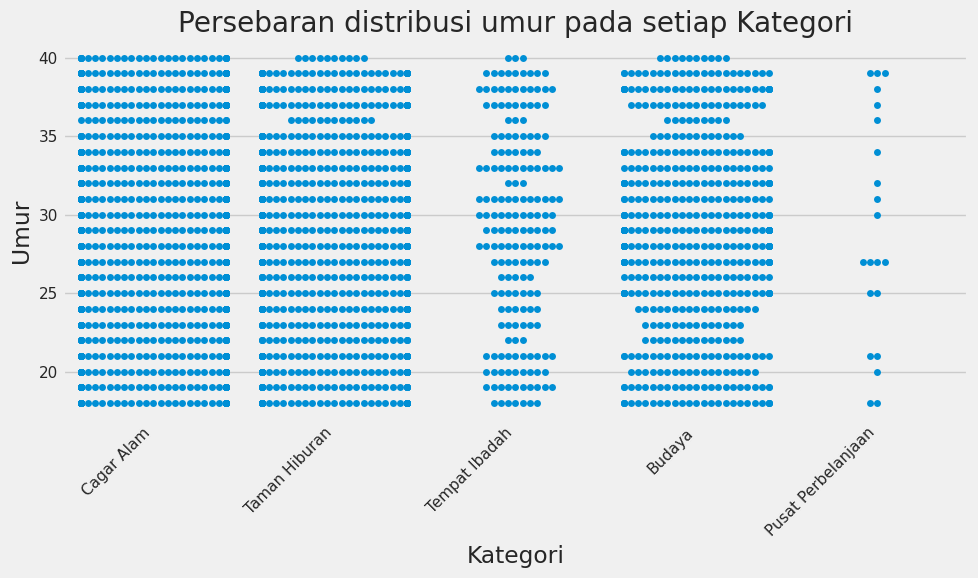

In [31]:
plt.figure(figsize=(10, 6))
sns.swarmplot(data=df_bandung, x='Category', y='Age')
plt.title('Persebaran distribusi umur pada setiap Kategori')
plt.xlabel('Kategori')
plt.ylabel('Umur')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

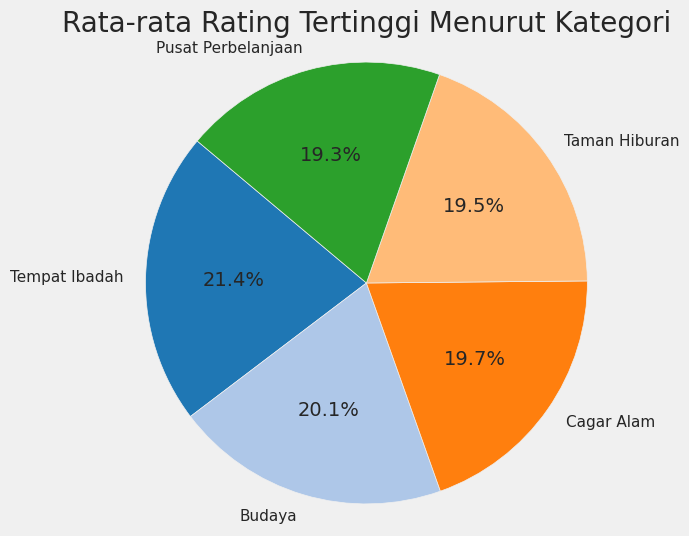

In [32]:
category_rating = df_bandung.groupby('Category')['Rating'] \
.mean().reset_index().sort_values(by='Rating', ascending=False)

categories = category_rating['Category']
ratings = category_rating['Rating']
colors = plt.cm.tab20.colors[:len(categories)]

plt.figure(figsize=(6, 6))
plt.pie(ratings, labels=categories, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Rata-rata Rating Tertinggi Menurut Kategori')
plt.axis('equal')
plt.show()

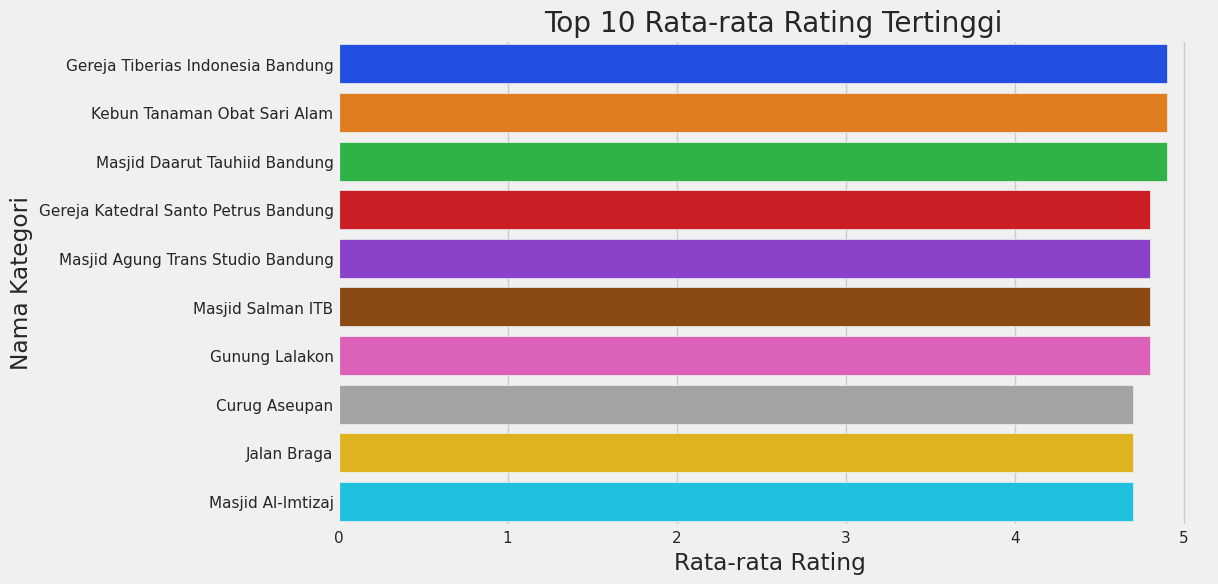

In [33]:
top_place_rating = df_bandung.groupby('Place_Name')['Rating'] \
.mean().reset_index().sort_values(by='Rating', ascending=False)[:10]

plt.figure(figsize=(10, 6))
sns.barplot(y='Place_Name', x='Rating', data=top_place_rating, palette='bright')
plt.title('Top 10 Rata-rata Rating Tertinggi')
plt.ylabel('Nama Kategori')
plt.xlabel('Rata-rata Rating ')
plt.show()

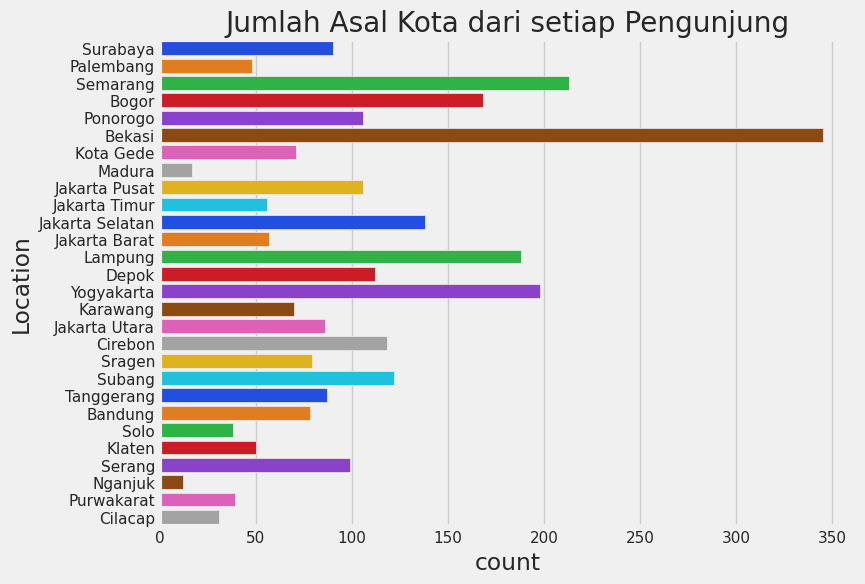

In [34]:
askot = df_bandung['Location'].apply(lambda x : x.split(',')[0])

plt.figure(figsize=(8,6))
sns.countplot(y=askot, palette='bright')
plt.title('Jumlah Asal Kota dari setiap Pengunjung')
plt.show()

<Axes: >

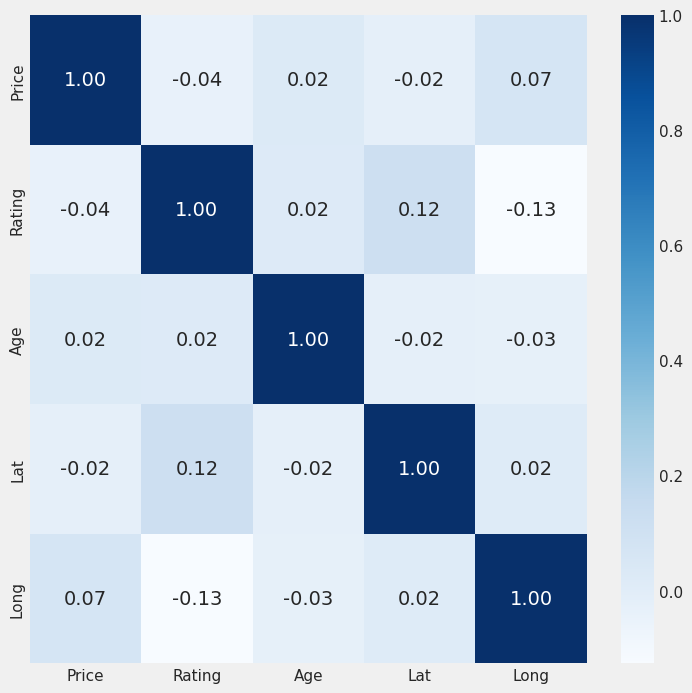

In [35]:
plt.figure(figsize=(8, 8))
sns.heatmap(df_bandung[nums].corr(), cmap='Blues', annot=True, fmt='.2f')

Tidak ada korelasi tinggi antar satu fitur dengan lainnya. Tentunya hal ini harus dikaitkan dengan problem kita yakni sistem recommendet. Oleh karena itu kita hanya membutuhkan fitur dari User_Id, Place_Id, dan Rating.

# Pre-processing

In [68]:
df = rating.copy()
df.head()
df = df[df["Place_Id"].isin(id_place_murah)]

In [69]:
def dict_encoder(col, data=df):

  # Mengubah kolom suatu dataframe menjadi list tanpa nilai yang sama
  unique_val = data[col].unique().tolist()

  # Melakukan encoding value kolom suatu dataframe ke angka
  val_to_val_encoded = {x: i for i, x in enumerate(unique_val)}

  # Melakukan proses encoding angka ke value dari kolom suatu dataframe
  val_encoded_to_val = {i: x for i, x in enumerate(unique_val)}
  return val_to_val_encoded, val_encoded_to_val

In [70]:
# Encoding User_Id
user_to_user_encoded, user_encoded_to_user = dict_encoder('User_Id')

# Mapping User_Id ke dataframe
df['user'] = df['User_Id'].map(user_to_user_encoded)

In [71]:
# Encoding Place_Id
place_to_place_encoded, place_encoded_to_place = dict_encoder('Place_Id')

# Mapping Place_Id ke dataframe place
df['place'] = df['Place_Id'].map(place_to_place_encoded)

In [73]:
# Mendapatkan jumlah user dan place
num_users, num_place = len(user_to_user_encoded), len(place_to_place_encoded)

# Mengubah rating menjadi nilai float
df['Place_Ratings'] = df['Place_Ratings'].values.astype(np.float32)

# Mendapatkan nilai minimum dan maksimum rating
min_rating, max_rating = min(df['Place_Ratings']), max(df['Place_Ratings'])

print(f'Number of User: {num_users}, Number of Place: {num_place}, Min Rating: {min_rating}, Max Rating: {max_rating}')



Number of User: 299, Number of Place: 113, Min Rating: 1.0, Max Rating: 5.0


In [74]:
# Mengacak dataset
df = df.sample(frac=1, random_state=42).iloc[:1000,:]
df

,User_Id,Place_Id,Place_Ratings,user,place
5673,171,283,3.0,169,16
3401,104,291,5.0,103,96
4559,139,278,2.0,137,81
1886,58,275,1.0,57,42
2519,78,291,5.0,77,96
...,...,...,...,...,...
2764,86,310,1.0,85,15
5488,166,328,5.0,164,6
2658,82,298,1.0,81,34
8462,255,279,3.0,253,72


In [75]:
df.Place_Ratings

5673    3.0
3401    5.0
4559    2.0
1886    1.0
2519    5.0
       ... 
2764    1.0
5488    5.0
2658    1.0
8462    3.0
6239    5.0
Name: Place_Ratings, Length: 1000, dtype: float32

In [76]:
# Membuat variabel x untuk mencocokkan data user dan place menjadi satu value
x = df[['user', 'place']].values

# Membuat variabel y untuk membuat rating dari hasil
y = df['Place_Ratings'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.7 * df.shape[0])
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x,y,train_size=.8, random_state=123)

In [77]:
x_train[:,0].shape

(800,)

In [78]:
y_train.shape

(800,)

In [79]:
def dense_block(n1,x,f,g,l):
    fc1 = Dense(n1, activation=f,activity_regularizer=l,bias_regularizer=l,kernel_regularizer=l)(x)
    fc1 = Dense(n1, activation=g,activity_regularizer=l,bias_regularizer=l,kernel_regularizer=l)(fc1)
    return fc1

In [80]:
# MODEL FIX

# creating book embedding path
from tensorflow.keras.layers import Embedding, Input, Flatten, Concatenate, Dense, LSTM, Attention, BatchNormalization, SimpleRNN
from tensorflow.keras import Model

movie_input = Input(shape=[1], name="Movie-Input")

movie_embedding = Embedding(num_place, 5, name="Movie-Embedding")(movie_input)
# fc movie
movie_vec = Flatten(name="Flatten-Books")(movie_embedding)

# creating user embedding path
user_input = Input(shape=[1], name="User-Input")
user_embedding = Embedding(num_users, 5, name="User-Embedding")(user_input)
# fc user
user_vec = Flatten(name="Flatten-Users")(user_embedding)

# concatenate features
conc = Concatenate()([movie_vec, user_vec])
g,f,n1,n2,n3=None,"relu",1024,512,256
# add fully-connected-layers
fc1 = Dense(n1, activation=f)(conc)
fc1 = Dense(n1, activation=g)(fc1)
fc2 = Dense(n2,activation=g)(fc1)
fc2 = Dense(n2,activation=g)(fc1)
fc3 = Dense(n3,activation=f)(fc2)
fc3 = Dense(n3,activation=g)(fc3)


# fc3 = Dense(100, activation='relu')(fc2)


# fc3 = Dense(32, activation='relu')(fc2)
out = Dense(1)(fc3)
# # Create model and compile it
model2 = Model([user_input, movie_input], out)
model2.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adagrad(0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)
history = model2.fit([x_train[:,0],x_train[:,1]], y_train,validation_data = ([x_val[:,0], x_val[:,1]], y_val), epochs=100, verbose=2)


Epoch 1/100
25/25 - 5s - loss: 1.1711 - root_mean_squared_error: 0.5182 - val_loss: 0.9596 - val_root_mean_squared_error: 0.4647 - 5s/epoch - 181ms/step
Epoch 2/100
25/25 - 1s - loss: 0.9096 - root_mean_squared_error: 0.4587 - val_loss: 0.8366 - val_root_mean_squared_error: 0.4174 - 1s/epoch - 57ms/step
Epoch 3/100
25/25 - 1s - loss: 0.8116 - root_mean_squared_error: 0.4171 - val_loss: 0.7679 - val_root_mean_squared_error: 0.3824 - 699ms/epoch - 28ms/step
Epoch 4/100
25/25 - 1s - loss: 0.7549 - root_mean_squared_error: 0.3869 - val_loss: 0.7287 - val_root_mean_squared_error: 0.3585 - 689ms/epoch - 28ms/step
Epoch 5/100
25/25 - 1s - loss: 0.7231 - root_mean_squared_error: 0.3673 - val_loss: 0.7082 - val_root_mean_squared_error: 0.3445 - 676ms/epoch - 27ms/step
Epoch 6/100
25/25 - 1s - loss: 0.7063 - root_mean_squared_error: 0.3560 - val_loss: 0.6983 - val_root_mean_squared_error: 0.3374 - 699ms/epoch - 28ms/step
Epoch 7/100
25/25 - 1s - loss: 0.6980 - root_mean_squared_error: 0.3502 - v

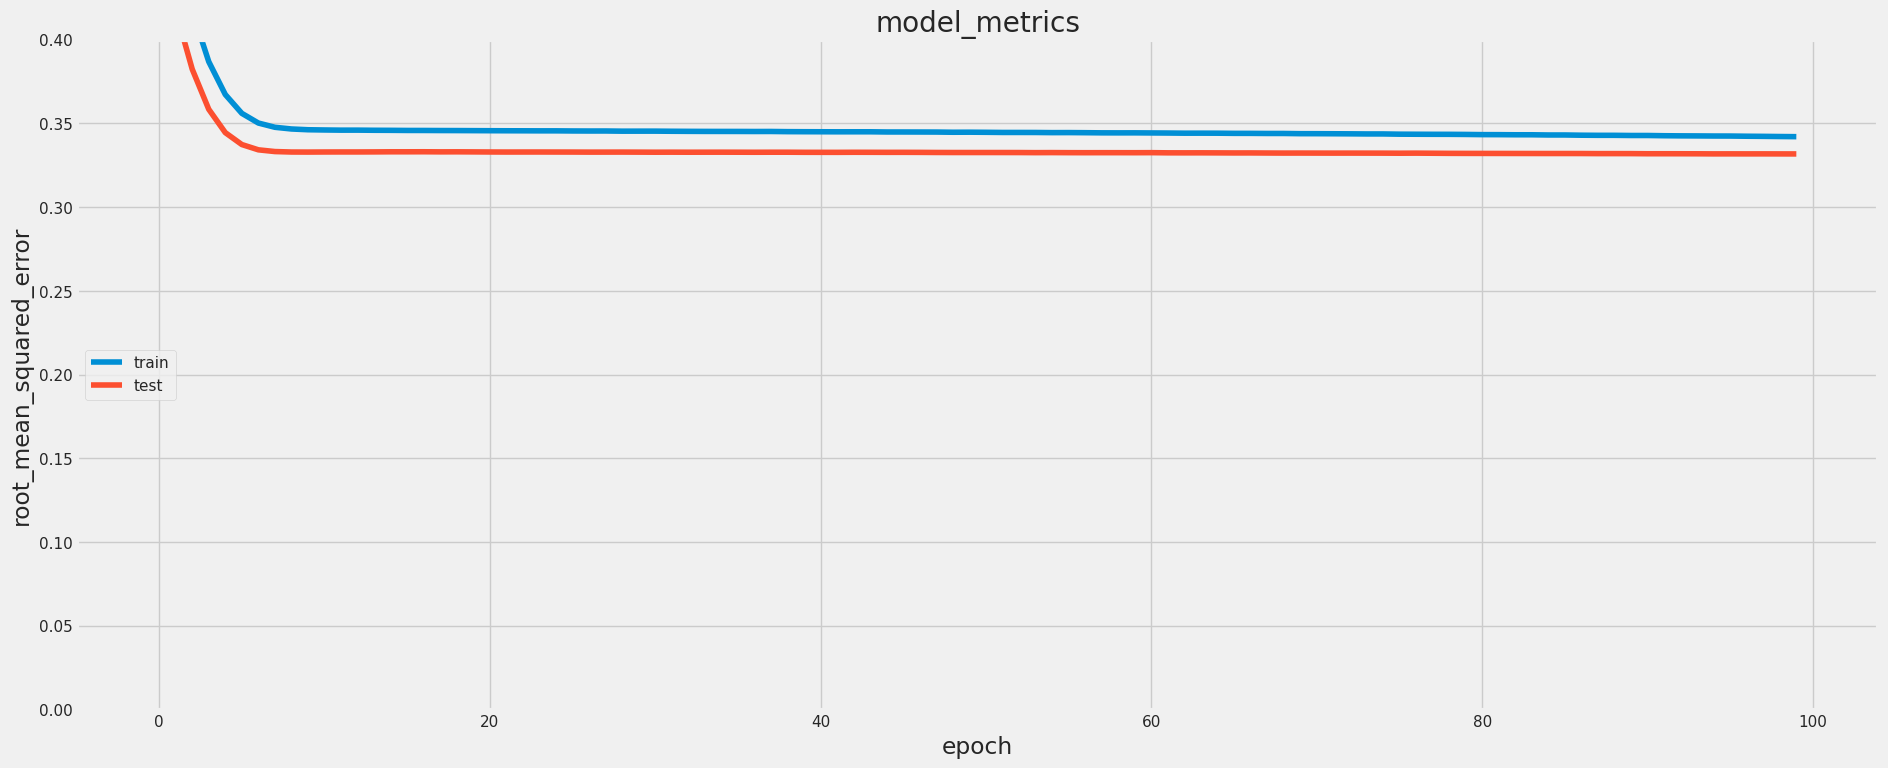

In [81]:
# Menampilkan plot loss dan validation

plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.ylim(ymin=0, ymax=0.4)
plt.legend(['train', 'test'], loc='center left')
plt.show()